# List 1
## Analysis of Unstructured Data
### Anna Szymanek 230042

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import squarify
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

My dataset is from https://github.com/sahilmishra0012/Datasets/tree/master/Police_Department_Incident.

This Problem Data set of San Francisco contains information about the crime in San Francisco. I'm going to analyze the data, visualize the data using diffrent tools adn make some summary.

## Reading a dataset

Firstly I'm reading the dataset using Pandas.

In [3]:
data = pd.read_csv('./Police_Department_Incidents_-_Previous_Year__2016_.csv')

I check  data shape:

In [4]:
data.shape

(150500, 13)

My dateset has 13 columns and 120500 rows.

Now, I want see some sample records.

In [5]:
data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


Columns descriptions:
* IncidntNum - int - Incident Number (id)
* Category - string - Category of Crime
* Descript - string - Description of Crime
* DayOfWeek - string - Day of Week when the crime happened
* Date - date - Date of Crime
* Time - time - Time of Crime
* PdDistrict - string - District
* Resolution - string - Kind of Punishment given to the criminal to resolve the case
* Address - string - Address where the crime scene happened
* X - float - Latitude of the crime Location
* Y - float - Longitude of the Crime Location
* Location - (X, Y) - Exact Location Name
* PdId - int - Indentify Number

The column which include incident number is useless, becouse is only id number, I decided to drop this column and column with Location, becouse columns X and Y contains the same data.

In [6]:
data.drop(['IncidntNum', 'Location'], axis = 1, inplace = True)

Let's check some sample statistics of numerical data.

In [7]:
data.describe()

,X,Y,PdId
count,150500.000000,150500.000000,1.505000e+05
mean,-122.423599,37.768921,1.616440e+13
std,0.026210,0.023637,5.535976e+11
min,-122.513642,37.707922,1.135121e+12
25%,-122.434036,37.756486,1.603283e+13
50%,-122.416903,37.775421,1.606541e+13
75%,-122.406605,37.785063,1.609764e+13
max,-122.365565,37.819975,9.910090e+13


I check 'null' values in columns.

In [8]:
data.isnull().sum()

Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    1
Resolution    0
Address       0
X             0
Y             0
PdId          0
dtype: int64

Only in PdDistrict columns I have null value, I fill this data, becouse I can fill this value based on the previous values in this column.

In [9]:
data['PdDistrict'].fillna(data['PdDistrict'].mode()[0], inplace = True)

Now, shouldn't be any null values. 

Let's check this:

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 11 columns):
Category      150500 non-null object
Descript      150500 non-null object
DayOfWeek     150500 non-null object
Date          150500 non-null object
Time          150500 non-null object
PdDistrict    150500 non-null object
Resolution    150500 non-null object
Address       150500 non-null object
X             150500 non-null float64
Y             150500 non-null float64
PdId          150500 non-null int64
dtypes: float64(2), int64(1), object(8)
memory usage: 12.6+ MB


I'm extracting month, day and week of the month from the date. I also decided to create new column Weekend 

## Datetime

Firstly, I'm analyze the time of crime. 


Based on the datatime format, I extract the date and the month.

After this, I count crimes in each month.

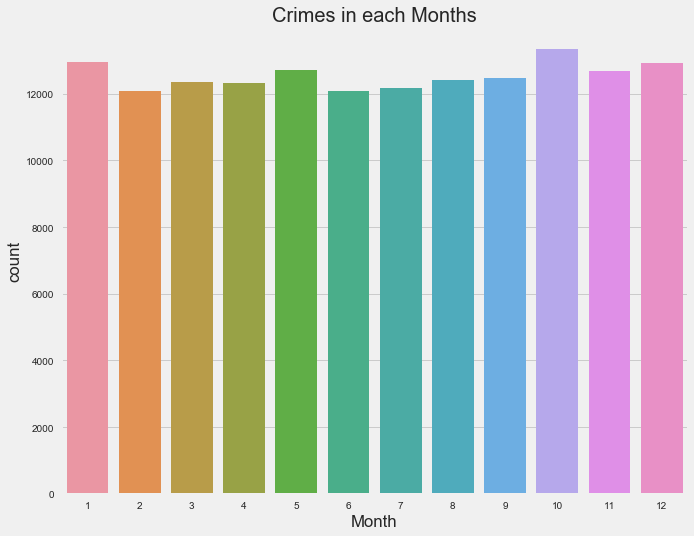

In [11]:
plt.style.use('seaborn')

data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month

sns.countplot(data['Month'])
plt.title('Crime count in each Months', fontsize = 20)

plt.show()

Most of the crimes took place in October, but there is no periodicity in the number of crimes depending on, for example, the season.


Then I check the dependence of the number of crimes on the day of the week.


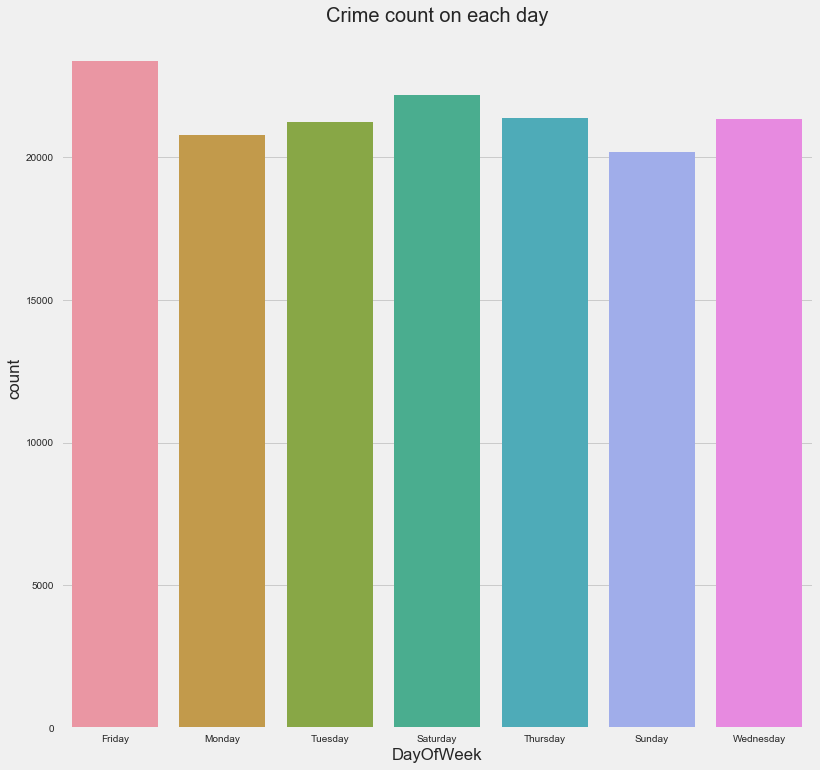

In [25]:
data['DayOfWeek'].value_counts()
sns.countplot(data['DayOfWeek'])
plt.title('Crime count on each day',fontsize = 20)

plt.show()

You can see that most crimes take place on Friday and Saturday, so it seems reasonable to add a column with a categorical variable indicating whether the crime happened on a weekend (Friday, Saturday, Sunday) or not.

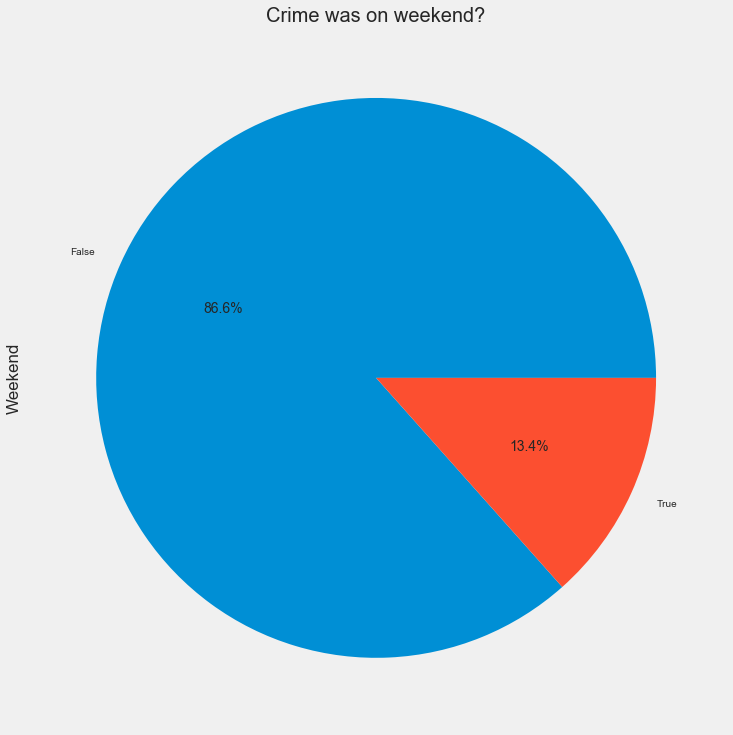

In [46]:
data['Weekend'] = data.DayOfWeek.apply(lambda x: True if x in ['Friday, Saturday','Sunday'] else False)

d_c = data['Weekend'].value_counts()
d_c.plot.pie(x = d_c, autopct="%.1f%%")
plt.title('Crime was on weekend?',fontsize = 20)

plt.show()

But, in this chart I see that isn't exisist strong dependency beetween the free days and number of crimes.

Checking the time at which crime occurs mostly



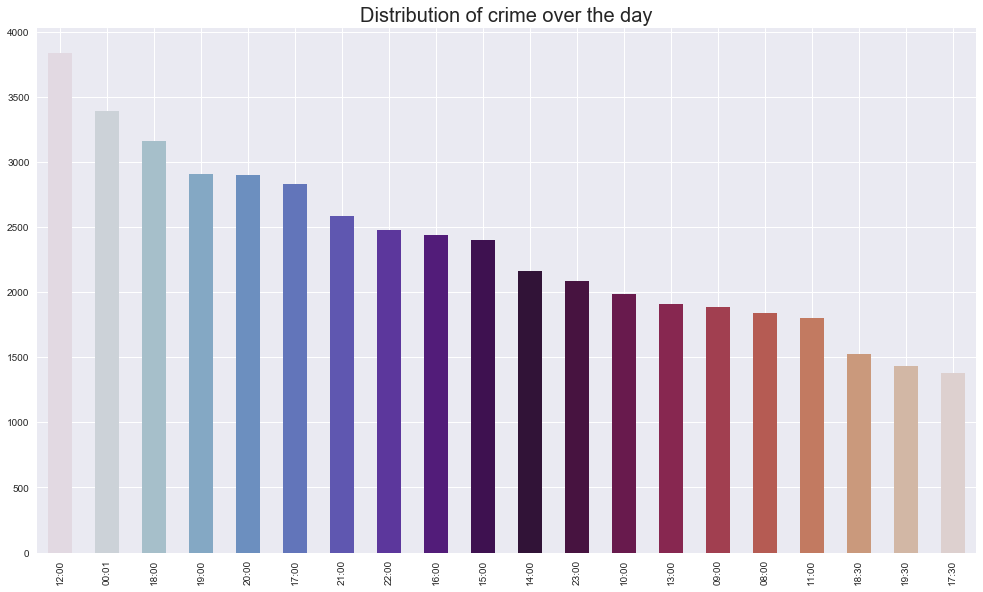

In [15]:
color = plt.cm.twilight(np.linspace(0, 5, 100))
data['Time'].value_counts().head(20).plot.bar(color = color, figsize = (15, 9))

plt.title('Distribution of crime over the day', fontsize = 20)
plt.show()

In [14]:
def PartofDay(a):
    if a in ['23','00','01','02']:
        return 'Midnight'
    elif a in ['03','04','05','06']:
        return 'Early Morning'
    elif a in ['07','08','09','10']:
        return 'Morning'
    elif a in ['11','12','13','14']:
        return 'Noon'
    elif a in ['15','16','17','18']:
        return 'Evening'
    else:
        return 'Night'

data['PartofDay'] = data.Time.apply(lambda x: PartofDay(x.split(':')[0]))

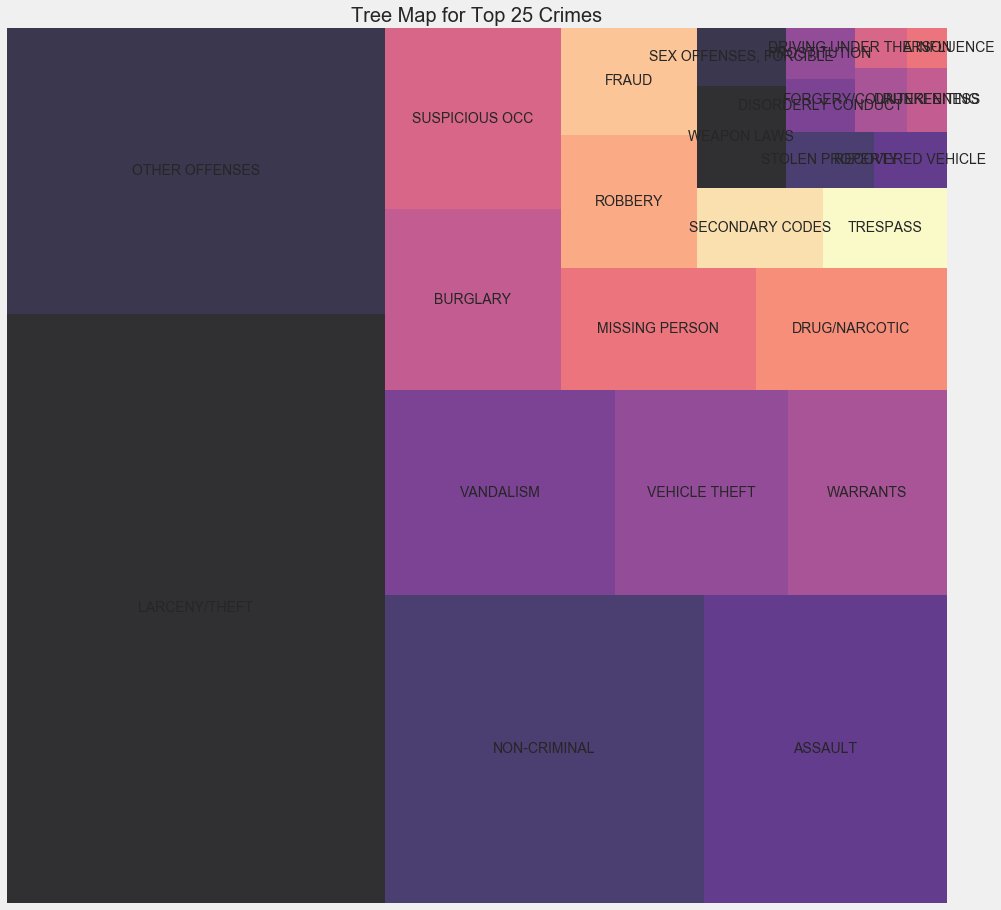

In [16]:
# plotting a tree map

y = data['Category'].value_counts().head(25)
    
plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fivethirtyeight')

color = plt.cm.magma(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Top 25 Crimes', fontsize = 20)

plt.axis('off')
plt.show()

## Description of the crime

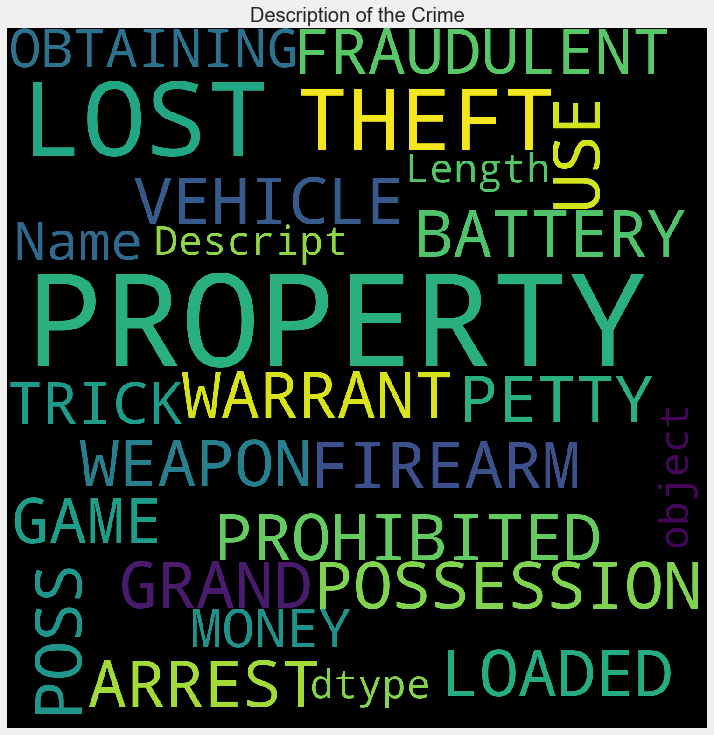

In [17]:
plt.rcParams['figure.figsize'] = (12, 12)
#plt.style.use('fast')

wc = WordCloud( width = 1500, height = 1500).generate(str(data['Descript']))
plt.title('Description of the Crime', fontsize = 20)

plt.imshow(wc)
plt.axis('off')
plt.show()

## Geospatial Visualization

In [18]:
t = data.PdDistrict.value_counts()

table = pd.DataFrame(data=t.values, index=t.index, columns=['Count'])
table = table.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])

table = table.reset_index()
table.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)

table

,Neighborhood,Count
0,CENTRAL,17666
1,NORTHERN,20100
2,PARK,8699
3,SOUTHERN,28446
4,MISSION,19503
5,TENDERLOIN,9942
6,RICHMOND,8922
7,TARAVAL,11325
8,INGLESIDE,11594
9,BAYVIEW,14303


In [19]:
gjson = r'https://cocl.us/sanfran_geojson'
sf_map = folium.Map(location = [37.77, -122.42], zoom_start = 12)

In [20]:
sf_map.choropleth(
    geo_data=gjson,
    data=table,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)
sf_map